In [253]:
import pandas as pd
import numpy as np

cars = pd.read_csv('scout_ErsteDaten.csv', error_bad_lines=False, delimiter=';')
brands = pd.read_csv('Marken.csv', header= None, usecols=[0,1,3, 4] , error_bad_lines=False, delimiter=';', encoding='ISO-8859-1')
car_manufacturers = pd.read_csv('CarManufacturers.csv', error_bad_lines=False, delimiter=';')

In [254]:
#Generating year and month
cars["month"] = cars["data"].str.split('.').str[0]
cars["year"] = cars["data"].str.split('.').str[1]
cars.head()

,data,km,model,price,month,year
0,11.202,4'500 km,HONDA CR-V 2.0i MMD Hybrid Elegance 4WD Automatic,CHF 36'900.–,11,202
1,12.2013,153'200 km,MERCEDES-BENZ E 250 7G-Tronic,CHF 19'800.–,12,2013
2,3.202,6'900 km,BMW X3 M40d Individual Aut. 4x4 (CH),CHF 78'900.–,3,202
3,Neu,12 km,SUZUKI Swace 1.8 Hybrid Compact+,CHF 31'300.–,Neu,NaN
4,Neu,12 km,SUZUKI Ignis 1.2i Piz Sulai Top Hybrid 4x4,CHF 22'400.–,Neu,NaN


In [255]:
#Correcting year and month
cars["year"].unique()
cars["year"][cars["year"]=='202']='2020'
cars["year"][cars["year"].isna()]='2021'
cars["month"][cars["month"]=="Neu"]='2'

In [207]:
type(cars[cars["year"].apply(len)==3]["year"])

pandas.core.series.Series

In [256]:
#Correcting km
cars["km"]=cars["km"].str.rstrip(' km')
cars['km'] = [float(val.replace("'","").strip()) for val in cars['km']]
cars.head()

,data,km,model,price,month,year
0,11.202,4500.0,HONDA CR-V 2.0i MMD Hybrid Elegance 4WD Automatic,CHF 36'900.–,11,2020
1,12.2013,153200.0,MERCEDES-BENZ E 250 7G-Tronic,CHF 19'800.–,12,2013
2,3.202,6900.0,BMW X3 M40d Individual Aut. 4x4 (CH),CHF 78'900.–,3,2020
3,Neu,12.0,SUZUKI Swace 1.8 Hybrid Compact+,CHF 31'300.–,2,2021
4,Neu,12.0,SUZUKI Ignis 1.2i Piz Sulai Top Hybrid 4x4,CHF 22'400.–,2,2021


In [257]:
#Correcting price
cars["price"]=cars["price"].str.lstrip('CHF ')
cars["price"]=cars["price"].str.rstrip('.–')
cars.head()

,data,km,model,price,month,year
0,11.202,4500.0,HONDA CR-V 2.0i MMD Hybrid Elegance 4WD Automatic,36'900,11,2020
1,12.2013,153200.0,MERCEDES-BENZ E 250 7G-Tronic,19'800,12,2013
2,3.202,6900.0,BMW X3 M40d Individual Aut. 4x4 (CH),78'900,3,2020
3,Neu,12.0,SUZUKI Swace 1.8 Hybrid Compact+,31'300,2,2021
4,Neu,12.0,SUZUKI Ignis 1.2i Piz Sulai Top Hybrid 4x4,22'400,2,2021


In [258]:
#Correcting model
cars["model2"]=cars["model"].str.lower()
cars.head()

,data,km,model,price,month,year,model2
0,11.202,4500.0,HONDA CR-V 2.0i MMD Hybrid Elegance 4WD Automatic,36'900,11,2020,honda cr-v 2.0i mmd hybrid elegance 4wd automatic
1,12.2013,153200.0,MERCEDES-BENZ E 250 7G-Tronic,19'800,12,2013,mercedes-benz e 250 7g-tronic
2,3.202,6900.0,BMW X3 M40d Individual Aut. 4x4 (CH),78'900,3,2020,bmw x3 m40d individual aut. 4x4 (ch)
3,Neu,12.0,SUZUKI Swace 1.8 Hybrid Compact+,31'300,2,2021,suzuki swace 1.8 hybrid compact+
4,Neu,12.0,SUZUKI Ignis 1.2i Piz Sulai Top Hybrid 4x4,22'400,2,2021,suzuki ignis 1.2i piz sulai top hybrid 4x4


In [259]:
# Generating brand:
cars["brand"] = cars["model2"].str.split(' ', 1).str.get(0)
cars.head()
cars["brand"][cars["brand"]=="aston"]="aston martin"
cars["brand"][cars["brand"]=="alfa"]="alfa romeo"
cars["brand"][cars["brand"]=="vw"]="volkswagen"
cars["brand"][cars["brand"]=="land"]="land rover"
cars["brand"][cars["brand"]=="austin"]="austin-healey"
cars["brand"][cars["brand"]=="triumph"]="standard-triumph"
cars["brand"][cars["brand"]=="amc"]="amc / eagle"
cars["brand"][cars["brand"]=="ds"]="ds automobiles"
cars["brand"][cars["brand"]=="bmw-alpina"]="bmw"




<ipython-input-259-2f47fc9e08dc>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cars["brand"][cars["brand"]=="aston"]="aston martin"
<ipython-input-259-2f47fc9e08dc>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cars["brand"][cars["brand"]=="alfa"]="alfa romeo"
<ipython-input-259-2f47fc9e08dc>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cars["brand"][cars["brand"]=="vw"]="volkswagen"
<ipython-input-259-2f47fc9e08dc>:7: Settin

In [260]:
car_manufacturers["brand"]=car_manufacturers["brand"].str.lower()
car_manufacturers

,brand,country
0,ac cars,United Kingdom
1,acura,Japan
2,alfa romeo,Italy
3,alpine,France
4,alvis,United Kingdom
...,...,...
175,riley (included in bmc),United Kingdom
176,wolseley (included in bmc),United Kingdom
177,tvr (insufficient info to include it),United Kingdom
178,packard (insufficient info to include it),United States


In [261]:
# Merge car dataset with manufacturer dataset
cars_merged = pd.merge(cars, car_manufacturers, how="left", on=["brand"])
cars_na = cars_merged[cars_merged["country"].isna()]
cars_na["brand"].unique()
cars_na.to_csv(r'cars_na.csv', index = False, header=True)
# Around 400 cars do not have a brand 

(147786, 8)


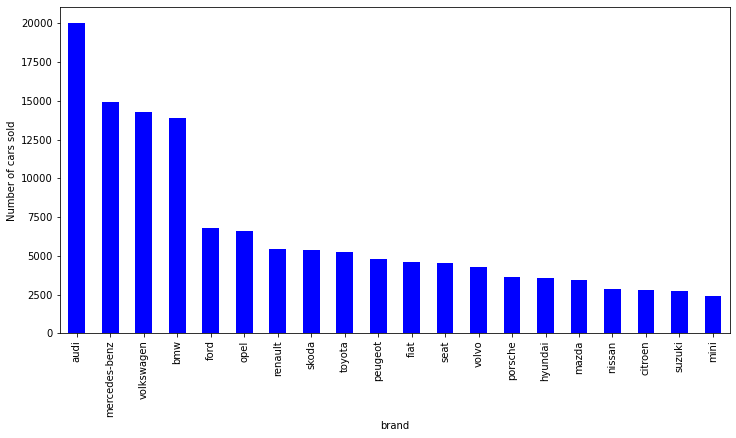

In [262]:
from matplotlib import pyplot as plt
import seaborn as sns
plt.figure(figsize=(12,6))
cars_merged.groupby('brand')['brand'].count().sort_values(ascending=False).head(20).plot.bar(color='b')
plt.ylabel('Number of cars sold')
print(cars.shape)

<AxesSubplot:xlabel='country'>

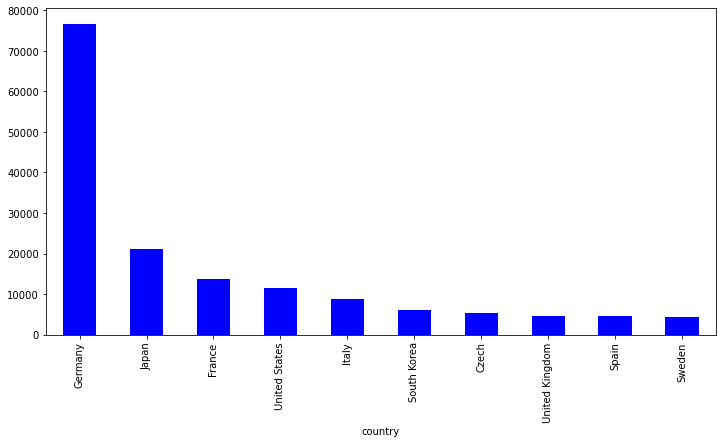

In [263]:
plt.figure(figsize=(12,6))
cars_merged.groupby('country')['country'].count().sort_values(ascending=False).head(10).plot.bar(color='b')

In [264]:
newcars = pd.read_csv('newcar.csv', error_bad_lines=False, delimiter=';')

In [265]:
# create identifier for new cars
newcars["id"]= np.arange(len(newcars))+1

In [266]:
#Correcting lowerbound and upperbound
newcars["lowerbound"]=newcars["lowerbound"].str.lstrip('CHF ')
newcars["lowerbound"]=newcars["lowerbound"].str.rstrip('.-')
newcars["upperbound"]=newcars["upperbound"].str.lstrip('CHF ')
newcars["upperbound"]=newcars["upperbound"].str.rstrip('.-')


In [267]:
#Correcting "door" variable
newcars["door"][newcars["door"]==45]='4-5'
newcars["door"][newcars["door"]==24]='2-4'
newcars["door"][newcars["door"]==35]='3-5'
newcars["door"][newcars["door"]==25]='2-5'
newcars["door"][newcars["door"]==34]='3-4'
newcars["door"].unique()

<ipython-input-267-ba4e5b565b33>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newcars["door"][newcars["door"]==45]='4-5'
<ipython-input-267-ba4e5b565b33>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newcars["door"][newcars["door"]==24]='2-4'
<ipython-input-267-ba4e5b565b33>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newcars["door"][newcars["door"]==35]='3-5'
<ipython-input-267-ba4e5b565b33>:5: SettingWithCopyWarning: 
A v

array([5, 2, 4, '4-5', '2-4', '3-5', '2-5', 3, 6, '3-4'], dtype=object)

In [268]:
# Convert variable "model_newcar" to new variable with low letters
newcars["model2"]=newcars["model_newcar"].str.lower()



In [269]:
newcars.head()


,PS,door,energy_efficiency,lowerbound,model_newcar,type_newcar,upperbound,use,id,model2
0,387-421PS,5,-,78'900.–,MERCEDES-BENZ GLA 45 AMG,(SUV / Geländewagen),84'400.–,-,1,mercedes-benz gla 45 amg
1,116-136PS,5,-,45'900.–,MERCEDES-BENZ GLB 180,(SUV / Geländewagen),57'280.–,52l100km,2,mercedes-benz glb 180
2,150-163PS,5,-,48'300.–,MERCEDES-BENZ GLB 200,(SUV / Geländewagen),61'780.–,52-73l100km,3,mercedes-benz glb 200
3,190PS,5,-,53'300.–,MERCEDES-BENZ GLB 220,(SUV / Geländewagen),64'030.–,57-62l100km,4,mercedes-benz glb 220
4,224PS,5,-,54'700.–,MERCEDES-BENZ GLB 250,(SUV / Geländewagen),65'430.–,76-85l100km,5,mercedes-benz glb 250


In [ ]:
key2 = []
key3 = []
for j in newcars.index:
    for i in enumerate(cars["model2"]):
        if newcars["model2"][j] in i[1]:
            key = print(i[0],'', newcars["id"][j])
            key2.append(i[0])
            key3.append(newcars["id"][j])
            
            

7203  1
13366  1
15234  1
20319  1
21942  1
21944  1
23082  1
24563  1
26723  1
28381  1
29018  1
30161  1
33813  1
34325  1
35714  1
38220  1
38609  1
40089  1
43267  1
44220  1
46134  1
51424  1
54681  1
59079  1
60198  1
62602  1
62649  1
64078  1
64272  1
64308  1
66020  1
67305  1
69347  1
70786  1
71138  1
71784  1
74274  1
74547  1
77269  1
78110  1
78366  1
84876  1
92372  1
92707  1
93321  1
97931  1
100929  1
101161  1
105987  1
106165  1
110420  1
113386  1
114706  1
123510  1
124448  1
127740  1
131687  1
132008  1
134168  1
134604  1
134730  1
134767  1
136047  1
137706  1
137735  1
138656  1
140742  1
142275  1
9006  3
9045  3
21423  3
22513  3
28908  3
28945  3
32624  3
39638  3
41509  3
43822  3
44404  3
48396  3
50948  3
63975  3
73987  3
81863  3
83300  3
94949  3
95309  3
109321  3
122809  3
122810  3
122812  3
122873  3
125325  3
138733  3
144553  3
146764  3
26591  4
31713  4
40474  4
45308  4
49593  4
56759  4
69681  4
70880  4
74585  4
113745  4
125019  4
131747 

132716  13
132848  13
133822  13
134176  13
134374  13
134475  13
134500  13
137507  13
139894  13
140592  13
141755  13
143314  13
145744  13
146254  13
147353  13
33411  14
62566  14
105998  14
125961  14
132901  14
135319  14
137699  14
138312  14
15124  15
15251  15
25246  15
34597  15
43341  15
63814  15
66359  15
70877  15
82613  15
84088  15
84375  15
84767  15
85195  15
91660  15
100414  15
106816  15
108045  15
112657  15
112775  15
113602  15
119966  15
134261  15
143561  15
144115  15
147387  15
2177  16
6407  16
7314  16
9116  16
10577  16
14072  16
14780  16
15433  16
15518  16
16014  16
17633  16
18396  16
18606  16
19568  16
21115  16
23643  16
28895  16
29251  16
30491  16
31332  16
31452  16
31668  16
32426  16
33445  16
35102  16
35546  16
35777  16
36569  16
38282  16
38700  16
40958  16
41541  16
41937  16
42582  16
43293  16
43799  16
44319  16
45793  16
47622  16
48864  16
48872  16
49495  16
49496  16
50875  16
52235  16
52919  16
53783  16
55502  16
57033  16
59

49404  26
50410  26
53122  26
53731  26
55599  26
63551  26
65878  26
66113  26
67461  26
69736  26
70555  26
73070  26
76978  26
79025  26
80841  26
80918  26
83012  26
83226  26
84509  26
86221  26
86317  26
86943  26
90110  26
90289  26
92001  26
99056  26
103065  26
103993  26
104434  26
104460  26
110649  26
111456  26
113171  26
114954  26
115242  26
115913  26
116202  26
116969  26
117091  26
117092  26
117811  26
118195  26
119008  26
119351  26
119399  26
120230  26
123049  26
124903  26
125589  26
130492  26
130564  26
130698  26
131686  26
132263  26
132666  26
132739  26
134375  26
136266  26
136824  26
138222  26
138226  26
138255  26
138573  26
139351  26
139892  26
139971  26
140308  26
141434  26
141729  26
142674  26
142913  26
143015  26
144087  26
144507  26
144510  26
144549  26
144789  26
145768  26
145797  26
146100  26
146273  26
796  27
924  27
5395  27
5636  27
8167  27
9029  27
9675  27
11060  27
15214  27
17618  27
18473  27
20626  27
20663  27
22010  27
2278

137214  35
137757  35
139169  35
139349  35
140347  35
140989  35
142199  35
145753  35
146996  35
147669  35
33536  36
68169  36
70623  36
79191  36
88576  36
111106  36
112645  36
164  37
665  37
1316  37
2098  37
2279  37
4044  37
5583  37
9012  37
9337  37
9899  37
11923  37
12861  37
13357  37
13987  37
15178  37
15292  37
15398  37
15443  37
15521  37
17849  37
19075  37
19531  37
19590  37
19732  37
21169  37
21874  37
22070  37
22122  37
22719  37
23766  37
23798  37
24055  37
24181  37
24228  37
24689  37
24760  37
24766  37
25347  37
25886  37
25974  37
26987  37
27349  37
27590  37
27732  37
27786  37
28751  37
28807  37
29252  37
29283  37
29847  37
30626  37
30655  37
31683  37
31699  37
31709  37
33457  37
33565  37
33599  37
33955  37
34590  37
35712  37
36246  37
36248  37
36249  37
36840  37
37761  37
38427  37
39593  37
40018  37
40090  37
40686  37
42546  37
43243  37
43264  37
43737  37
43939  37
44903  37
45128  37
45512  37
45580  37
45697  37
45736  37
45867  37


49090  43
50541  43
50781  43
52433  43
52614  43
53547  43
54210  43
55574  43
55778  43
57448  43
57508  43
57763  43
58248  43
58813  43
58902  43
62794  43
62947  43
63232  43
63435  43
63656  43
63837  43
65040  43
65545  43
65756  43
66271  43
66318  43
67397  43
70047  43
70457  43
70616  43
70727  43
73282  43
73690  43
73715  43
73839  43
74356  43
74621  43
74849  43
75253  43
75957  43
75961  43
76792  43
77879  43
78049  43
79876  43
83414  43
84636  43
85829  43
86547  43
88506  43
89316  43
91233  43
91897  43
92565  43
94930  43
94951  43
94971  43
95038  43
95479  43
96042  43
97771  43
98245  43
100162  43
100539  43
103673  43
104252  43
105999  43
106277  43
107446  43
107485  43
108886  43
109211  43
109600  43
110704  43
111112  43
111386  43
112797  43
113040  43
113074  43
113630  43
114025  43
114027  43
114215  43
115613  43
115866  43
116744  43
116821  43
117475  43
119458  43
119847  43
122897  43
124228  43
124672  43
125336  43
126633  43
127851  43
128736

129338  47
131871  47
133685  47
136499  47
138013  47
138023  47
139042  47
139048  47
139295  47
139988  47
143014  47
144021  47
145049  47
145127  47
146728  47
147372  47
103  48
2883  48
5432  48
6002  48
7461  48
9229  48
9333  48
9517  48
10552  48
11129  48
13822  48
14137  48
14636  48
14733  48
14790  48
16212  48
16251  48
19419  48
21193  48
21276  48
22354  48
23967  48
24003  48
24048  48
24538  48
24567  48
24714  48
25148  48
25899  48
27116  48
27787  48
28048  48
28301  48
28530  48
28712  48
28776  48
28893  48
29109  48
30272  48
31484  48
31558  48
31697  48
32896  48
34570  48
34605  48
34635  48
34678  48
34684  48
34931  48
35666  48
37226  48
37329  48
38626  48
38665  48
39698  48
41365  48
41557  48
42606  48
42874  48
44147  48
44213  48
44268  48
44671  48
47466  48
48011  48
48523  48
48899  48
49963  48
53023  48
54518  48
55075  48
58726  48
58856  48
58976  48
59572  48
59999  48
60781  48
63030  48
63819  48
63884  48
64982  48
66281  48
66345  48
674

110543  52
112451  52
115015  52
115264  52
115484  52
115580  52
119307  52
121606  52
121988  52
123822  52
124670  52
124869  52
126644  52
128036  52
128559  52
132620  52
136016  52
138408  52
139051  52
141800  52
141812  52
143194  52
143225  52
143463  52
7000  53
11583  53
11630  53
11742  53
11870  53
11895  53
13166  53
15102  53
15903  53
15925  53
16593  53
16669  53
17862  53
18250  53
20050  53
22367  53
23432  53
23808  53
23827  53
23829  53
23844  53
24517  53
24724  53
25166  53
25342  53
25496  53
25929  53
26668  53
27018  53
27160  53
27574  53
28309  53
28534  53
28760  53
29021  53
30155  53
30179  53
30760  53
30929  53
30945  53
31079  53
31712  53
31733  53
32446  53
32498  53
32851  53
32871  53
33414  53
33420  53
34445  53
35809  53
36119  53
36740  53
37221  53
40308  53
43697  53
43923  53
44330  53
44429  53
45420  53
46311  53
48341  53
48663  53
50775  53
50946  53
53908  53
55060  53
55699  53
56442  53
58774  53
58840  53
59045  53
61672  53
61896  

121633  59
124778  59
125754  59
127525  59
128035  59
128095  59
128897  59
129011  59
132490  59
135653  59
139049  59
140121  59
141040  59
141156  59
141253  59
141422  59
141784  59
143198  59
144264  59
145262  59
145353  59
147289  59
272  60
9541  60
9610  60
12444  60
14577  60
14611  60
15255  60
15837  60
19626  60
19658  60
20082  60
22606  60
23301  60
25203  60
26948  60
26982  60
26985  60
27128  60
33526  60
35640  60
35751  60
36094  60
37190  60
39686  60
40323  60
42588  60
44148  60
44172  60
44487  60
56324  60
57324  60
57643  60
61370  60
63959  60
68163  60
68241  60
71691  60
73084  60
77918  60
79170  60
82419  60
85045  60
86135  60
86156  60
86164  60
86270  60
86285  60
92314  60
92954  60
93304  60
96608  60
96856  60
99986  60
101440  60
104138  60
107977  60
108541  60
109722  60
109723  60
110016  60
112428  60
112538  60
112557  60
112967  60
114085  60
115719  60
115877  60
118654  60
119291  60
119356  60
119414  60
120404  60
120658  60
121633  60
1

58377  63
58535  63
58942  63
59404  63
59982  63
61624  63
61676  63
61776  63
62614  63
63116  63
63117  63
63193  63
63935  63
63990  63
64186  63
64405  63
64956  63
65050  63
65282  63
66206  63
66346  63
67942  63
68108  63
68246  63
68323  63
68442  63
68468  63
69382  63
70404  63
70602  63
71630  63
72266  63
72526  63
73136  63
74092  63
74305  63
74976  63
76002  63
76145  63
76647  63
77314  63
77548  63
78295  63
79457  63
79459  63
79680  63
79861  63
79874  63
80279  63
80653  63
80826  63
80839  63
81386  63
81448  63
81916  63
83010  63
83092  63
83106  63
83450  63
83944  63
84718  63
84754  63
84863  63
84951  63
85986  63
86053  63
86134  63
86166  63
86223  63
86259  63
86287  63
87295  63
87555  63
87595  63
88153  63
89913  63
90041  63
90102  63
91218  63
91219  63
91315  63
92510  63
92690  63
92959  63
93126  63
93165  63
95781  63
95805  63
96739  63
97183  63
98505  63
100494  63
100853  63
100918  63
101177  63
101235  63
101707  63
101708  63
102235  63
10

69382  66
70404  66
70602  66
71630  66
72266  66
72526  66
73136  66
74092  66
74305  66
74976  66
76002  66
76145  66
76647  66
77314  66
77548  66
78295  66
79457  66
79459  66
79680  66
79861  66
79874  66
80279  66
80653  66
80826  66
80839  66
81386  66
81448  66
81916  66
83010  66
83092  66
83106  66
83450  66
83944  66
84718  66
84754  66
84863  66
84951  66
85986  66
86053  66
86134  66
86166  66
86223  66
86259  66
86287  66
87295  66
87555  66
87595  66
88153  66
89913  66
90041  66
90102  66
91218  66
91219  66
91315  66
92510  66
92690  66
92959  66
93126  66
93165  66
95781  66
95805  66
96739  66
97183  66
98505  66
100494  66
100853  66
100918  66
101177  66
101235  66
101707  66
101708  66
102235  66
103995  66
104114  66
104265  66
104662  66
104876  66
106164  66
107205  66
108396  66
110826  66
111505  66
112406  66
113296  66
113772  66
113987  66
114400  66
114941  66
115604  66
115687  66
117639  66
119066  66
119308  66
120314  66
120328  66
120990  66
121197  

74052  69
74317  69
77483  69
78379  69
78437  69
78730  69
78740  69
78742  69
79079  69
79134  69
79255  69
79929  69
79930  69
80125  69
80202  69
80220  69
80494  69
81698  69
82104  69
83016  69
83050  69
83058  69
84241  69
84532  69
85447  69
85544  69
86460  69
86747  69
86837  69
87739  69
89211  69
89510  69
89653  69
90111  69
91405  69
92122  69
92810  69
92851  69
92926  69
93032  69
93041  69
93064  69
93773  69
94482  69
94501  69
95585  69
95665  69
96419  69
96772  69
96773  69
96777  69
97184  69
98068  69
98759  69
98761  69
98764  69
98773  69
98775  69
98785  69
98786  69
98787  69
98794  69
98817  69
98822  69
98826  69
98832  69
98849  69
99455  69
99570  69
100990  69
101541  69
103467  69
103642  69
104358  69
105695  69
107906  69
107916  69
107951  69
108224  69
108994  69
109098  69
109421  69
109962  69
110253  69
110290  69
110671  69
111168  69
111189  69
111190  69
111725  69
112565  69
113767  69
113981  69
114192  69
114224  69
117250  69
118152  69
11

33655  72
34029  72
34116  72
34196  72
34759  72
35088  72
35390  72
35538  72
37012  72
38645  72
41063  72
41121  72
41356  72
42137  72
43361  72
44204  72
44357  72
44452  72
44454  72
45366  72
45886  72
47431  72
48964  72
49340  72
50832  72
50957  72
51234  72
53493  72
53562  72
53616  72
54946  72
56273  72
56488  72
58237  72
58247  72
58329  72
61053  72
61366  72
61405  72
62569  72
64077  72
65157  72
65333  72
65362  72
65587  72
65921  72
65954  72
66817  72
67295  72
67306  72
67872  72
68156  72
68283  72
68528  72
68812  72
70028  72
70093  72
70171  72
70943  72
73170  72
74052  72
74317  72
77483  72
78379  72
78437  72
78730  72
78740  72
78742  72
79079  72
79134  72
79255  72
79929  72
79930  72
80125  72
80202  72
80220  72
80494  72
81698  72
82104  72
83016  72
83050  72
83058  72
84241  72
84532  72
85447  72
85544  72
86460  72
86747  72
86837  72
87739  72
89211  72
89510  72
89653  72
90111  72
91405  72
92122  72
92810  72
92851  72
92926  72
93032  72


20601  75
23889  75
26002  75
26487  75
27175  75
28923  75
29786  75
32877  75
32942  75
32996  75
34760  75
34892  75
37785  75
44541  75
46324  75
46391  75
50382  75
67939  75
69519  75
70155  75
73075  75
78746  75
78778  75
79249  75
86246  75
86734  75
91558  75
92011  75
96963  75
102917  75
109431  75
110060  75
110767  75
110836  75
113818  75
114422  75
127430  75
128654  75
130580  75
138581  75
140445  75
141179  75
146730  75
685  76
8067  76
15120  76
16397  76
17834  76
20601  76
23889  76
26002  76
26487  76
27175  76
28923  76
29786  76
32877  76
32942  76
32996  76
34760  76
34892  76
37785  76
44541  76
46324  76
46391  76
50382  76
67939  76
69519  76
70155  76
73075  76
78746  76
78778  76
79249  76
86246  76
86734  76
91558  76
92011  76
96963  76
102917  76
109431  76
110060  76
110767  76
110836  76
113818  76
114422  76
127430  76
128654  76
130580  76
138581  76
140445  76
141179  76
146730  76
685  77
8067  77
15120  77
16397  77
17834  77
20601  77
23889  7

11628  93
14838  93
14872  93
20975  93
22746  93
23860  93
26973  93
33406  93
33477  93
34300  93
34625  93
36701  93
40378  93
48308  93
55600  93
79517  93
79859  93
86052  93
86143  93
86160  93
91969  93
100239  93
101542  93
119107  93
120342  93
130897  93
135948  93
137412  93
147592  93
282  94
6403  94
7476  94
8833  94
11628  94
14838  94
14872  94
20975  94
22746  94
23860  94
26973  94
33406  94
33477  94
34300  94
34625  94
36701  94
40378  94
48308  94
55600  94
79517  94
79859  94
86052  94
86143  94
86160  94
91969  94
100239  94
101542  94
119107  94
120342  94
130897  94
135948  94
137412  94
147592  94
7004  95
9367  95
11410  95
15591  95
16544  95
17295  95
19257  95
20796  95
33803  95
41282  95
42859  95
45924  95
48915  95
53578  95
61238  95
61362  95
65595  95
67928  95
69290  95
70921  95
72039  95
80450  95
84772  95
85123  95
90550  95
99078  95
103633  95
113919  95
120348  95
130885  95
132455  95
147559  95
7004  96
9367  96
11410  96
15591  96
16544  

117529  106
118442  106
119203  106
120315  106
120553  106
121443  106
123215  106
123655  106
123660  106
123745  106
124449  106
125242  106
127376  106
128898  106
129061  106
129267  106
130648  106
131159  106
131851  106
132645  106
132918  106
137369  106
137772  106
139354  106
139410  106
139856  106
140467  106
140523  106
143153  106
144792  106
146101  106
146634  106
102  107
4971  107
5818  107
9447  107
10859  107
13850  107
13908  107
14254  107
14802  107
15303  107
15602  107
15605  107
15833  107
16011  107
16357  107
16374  107
17091  107
17552  107
18548  107
20088  107
22497  107
22823  107
23496  107
23513  107
24333  107
24991  107
27606  107
28418  107
28942  107
28994  107
29803  107
30656  107
30942  107
31714  107
33408  107
34315  107
34419  107
34739  107
36759  107
36880  107
37327  107
40019  107
40312  107
41488  107
41848  107
42239  107
42788  107
43143  107
44418  107
48531  107
49710  107
50698  107
53515  107
53834  107
58076  107
58943  107
59440

109727  116
110112  116
113616  116
117425  116
119389  116
119876  116
120487  116
121360  116
124462  116
124667  116
132866  116
133651  116
133955  116
134486  116
134897  116
135048  116
136810  116
138435  116
139832  116
141003  116
144791  116
863  121
5944  121
10733  121
10774  121
11225  121
12864  121
13353  121
13886  121
15287  121
15856  121
16882  121
17061  121
18297  121
18928  121
19129  121
19617  121
20105  121
20566  121
20620  121
20967  121
23526  121
24054  121
25474  121
25939  121
26980  121
27079  121
27111  121
27251  121
27267  121
27359  121
27738  121
27747  121
27784  121
27805  121
28539  121
28744  121
29827  121
29907  121
30116  121
30118  121
30351  121
31254  121
33561  121
34239  121
34449  121
34765  121
34911  121
35571  121
35591  121
35592  121
35737  121
36212  121
36240  121
36812  121
37581  121
39045  121
39150  121
39613  121
39775  121
39777  121
39844  121
40291  121
40306  121
40355  121
40356  121
41492  121
41673  121
42771  121
431

112948  123
113045  123
113254  123
113549  123
114502  123
114519  123
114662  123
115101  123
115475  123
115668  123
115746  123
115874  123
115884  123
116152  123
118134  123
118479  123
118607  123
118647  123
119482  123
119500  123
119699  123
120966  123
121271  123
121272  123
121390  123
121639  123
121973  123
122436  123
123610  123
123696  123
123816  123
123851  123
124447  123
124459  123
124474  123
124475  123
124944  123
125023  123
125804  123
126556  123
127204  123
127389  123
127953  123
128715  123
128784  123
128913  123
128984  123
129351  123
130200  123
130619  123
131150  123
131855  123
132547  123
132943  123
133270  123
133571  123
133909  123
134355  123
135450  123
136831  123
137366  123
137632  123
137731  123
137733  123
138216  123
138909  123
139074  123
139972  123
140027  123
141899  123
142934  123
146102  123
146169  123
146307  123
146348  123
146727  123
147388  123
147389  123
147476  123
919  124
1021  124
1041  124
1917  124
2141  124
106

34059  130
34142  130
34150  130
34525  130
41917  130
44242  130
44302  130
44420  130
44606  130
46529  130
50077  130
50134  130
50253  130
58739  130
58891  130
58907  130
59845  130
61411  130
63452  130
63877  130
65564  130
66545  130
69535  130
70265  130
70335  130
70710  130
71669  130
72359  130
74184  130
77005  130
77156  130
80380  130
80406  130
80674  130
81306  130
82516  130
83108  130
86150  130
86772  130
87391  130
87996  130
88530  130
89235  130
91970  130
94729  130
95237  130
97534  130
98552  130
98725  130
98911  130
99337  130
101021  130
102040  130
104032  130
105941  130
105963  130
106029  130
106056  130
106977  130
110806  130
112779  130
113705  130
115052  130
115962  130
119306  130
119400  130
120294  130
124703  130
128656  130
129404  130
132115  130
132153  130
132659  130
132747  130
133215  130
134435  130
134610  130
134834  130
135593  130
136382  130
136828  130
138528  130
139360  130
140510  130
142306  130
143394  130
8590  131
8916  131

134234  139
135588  139
135591  139
136015  139
138486  139
144793  139
145714  139
145966  139
146027  139
1048  140
2247  140
2258  140
5969  140
9446  140
9485  140
9795  140
11930  140
12127  140
13794  140
13837  140
13863  140
13998  140
14746  140
14795  140
14844  140
14898  140
14902  140
14996  140
15540  140
15623  140
15870  140
16980  140
19847  140
20826  140
21018  140
21108  140
21891  140
24518  140
24798  140
25517  140
25732  140
25924  140
26676  140
26742  140
26964  140
26999  140
27189  140
29052  140
29484  140
29492  140
29570  140
29828  140
29875  140
30169  140
30835  140
30836  140
31053  140
31670  140
32846  140
39759  140
42015  140
42645  140
43386  140
43584  140
47542  140
47659  140
48168  140
53138  140
55262  140
63209  140
63668  140
64059  140
64383  140
64831  140
65286  140
67126  140
67184  140
68162  140
68455  140
69344  140
69833  140
72447  140
73168  140
73561  140
73822  140
74062  140
81027  140
85553  140
86011  140
86013  140
86019  1

78699  142
78728  142
78762  142
78769  142
79022  142
79123  142
79184  142
79686  142
80375  142
81223  142
82071  142
82072  142
82675  142
82775  142
84039  142
84051  142
84495  142
85204  142
86035  142
86040  142
86050  142
86073  142
86130  142
86163  142
87566  142
87632  142
87736  142
88444  142
89053  142
89070  142
89071  142
89077  142
89198  142
89199  142
90159  142
91081  142
91354  142
91472  142
92131  142
92497  142
93002  142
93957  142
94289  142
94484  142
94521  142
94542  142
94847  142
94921  142
96713  142
96795  142
96818  142
99693  142
100096  142
100305  142
100311  142
100396  142
100397  142
100727  142
100804  142
100805  142
100977  142
101271  142
101298  142
101554  142
101555  142
101556  142
102050  142
102056  142
102368  142
102805  142
102925  142
103368  142
103465  142
104027  142
104710  142
106037  142
106760  142
106785  142
107031  142
107239  142
108449  142
109545  142
109844  142
110031  142
110032  142
110089  142
110139  142
110275  

49017  146
50237  146
52880  146
52926  146
53724  146
53906  146
54579  146
55015  146
57145  146
57796  146
57813  146
58880  146
58881  146
63305  146
63530  146
64634  146
65130  146
65385  146
65504  146
66617  146
66906  146
67540  146
68257  146
68560  146
68703  146
69022  146
69356  146
69457  146
69786  146
70367  146
71382  146
71515  146
71557  146
73462  146
74617  146
75612  146
78240  146
78287  146
78967  146
79098  146
79365  146
81164  146
81762  146
81950  146
82742  146
85186  146
85258  146
85463  146
85763  146
86048  146
87729  146
88607  146
89085  146
89100  146
91176  146
91306  146
91882  146
95388  146
96661  146
101192  146
101386  146
101419  146
101437  146
103832  146
104016  146
104173  146
104671  146
105308  146
108411  146
109363  146
109430  146
109437  146
109492  146
109897  146
110782  146
111687  146
113548  146
118183  146
118230  146
118914  146
119571  146
119676  146
120308  146
120412  146
120916  146
121243  146
121278  146
121757  146
121

69758  151
72157  151
72548  151
77893  151
85816  151
88166  151
88514  151
89238  151
93968  151
99175  151
103477  151
107654  151
109110  151
109690  151
112296  151
112438  151
112737  151
113854  151
113938  151
114803  151
115641  151
117115  151
118911  151
119733  151
121668  151
126642  151
126999  151
130389  151
130819  151
136201  151
139179  151
141863  151
141940  151
143329  151
144868  151
145338  151
145469  151
9762  152
16638  152
22506  152
23858  152
24509  152
25322  152
26009  152
26070  152
28367  152
28533  152
28540  152
29072  152
30181  152
30623  152
30763  152
32536  152
32831  152
36088  152
37291  152
38202  152
38217  152
38302  152
39903  152
40092  152
40666  152
41210  152
43803  152
44577  152
45355  152
46176  152
52933  152
53951  152
56246  152
58849  152
58850  152
60436  152
60812  152
63559  152
63817  152
63820  152
67808  152
69758  152
72157  152
72548  152
77893  152
85816  152
88166  152
88514  152
89238  152
93968  152
99175  152
103477

34765  158
34911  158
35571  158
35591  158
35592  158
35737  158
36212  158
36240  158
36812  158
37581  158
39045  158
39150  158
39613  158
39775  158
39777  158
39844  158
40291  158
40306  158
40355  158
40356  158
41492  158
41673  158
42771  158
43188  158
43288  158
43733  158
44624  158
44858  158
44990  158
45327  158
45338  158
46286  158
46322  158
46325  158
46572  158
48118  158
48306  158
48714  158
48826  158
48865  158
51673  158
52974  158
53118  158
53816  158
53958  158
55244  158
55700  158
56286  158
56325  158
56346  158
57698  158
57812  158
58193  158
58868  158
58993  158
59822  158
60300  158
60785  158
61748  158
63050  158
63947  158
64105  158
64508  158
65281  158
65830  158
67343  158
68098  158
68135  158
68136  158
68165  158
68306  158
68320  158
69139  158
69572  158
69627  158
70280  158
71122  158
71147  158
71241  158
71470  158
71479  158
71569  158
71621  158
71627  158
72058  158
72563  158
72682  158
73073  158
73544  158
73652  158
73892  158

141899  160
142934  160
146102  160
146169  160
146307  160
146348  160
146727  160
147388  160
147389  160
147476  160
1161  161
9112  161
11048  161
12217  161
15919  161
17585  161
17714  161
18689  161
19536  161
20110  161
20302  161
21320  161
21760  161
22717  161
23313  161
23372  161
23537  161
23616  161
24211  161
24663  161
25194  161
26027  161
28353  161
28359  161
30886  161
30921  161
31677  161
32943  161
33419  161
33472  161
35728  161
35763  161
35846  161
37599  161
40031  161
40326  161
41928  161
44193  161
44206  161
44225  161
44399  161
44455  161
44536  161
45528  161
47176  161
48511  161
48538  161
48789  161
50871  161
50876  161
51771  161
52847  161
52900  161
56261  161
56376  161
56571  161
58836  161
58855  161
61352  161
62284  161
62695  161
64104  161
64306  161
64345  161
65410  161
65588  161
68470  161
68536  161
70634  161
70754  161
71605  161
71727  161
75113  161
76395  161
77078  161
84254  161
84442  161
84948  161
86049  161
94846  161
95

103350  164
105451  164
107363  164
107737  164
108228  164
108837  164
109947  164
110179  164
110284  164
110342  164
111142  164
112390  164
113417  164
114363  164
114492  164
118178  164
119357  164
120049  164
120925  164
120934  164
123359  164
125465  164
125846  164
128037  164
128216  164
128830  164
130829  164
133170  164
133345  164
133532  164
134135  164
135028  164
135981  164
136034  164
136247  164
136645  164
136710  164
136911  164
136914  164
137111  164
138188  164
138678  164
138775  164
138844  164
138893  164
138956  164
139086  164
139308  164
139772  164
140161  164
140571  164
141237  164
141521  164
142416  164
142436  164
144596  164
145079  164
146403  164
147391  164
147699  164
306  165
496  165
1317  165
1443  165
1460  165
1666  165
1761  165
1984  165
2296  165
3659  165
6393  165
6576  165
7017  165
8410  165
8678  165
9384  165
9495  165
9963  165
11807  165
12428  165
12723  165
13796  165
14025  165
14288  165
14358  165
15210  165
15381  165
155

100759  167
100869  167
100912  167
101035  167
103350  167
105451  167
107363  167
107737  167
108228  167
108837  167
109947  167
110179  167
110284  167
110342  167
111142  167
112390  167
113417  167
114363  167
114492  167
118178  167
119357  167
120049  167
120925  167
120934  167
123359  167
125465  167
125846  167
128037  167
128216  167
128830  167
130829  167
133170  167
133345  167
133532  167
134135  167
135028  167
135981  167
136034  167
136247  167
136645  167
136710  167
136911  167
136914  167
137111  167
138188  167
138678  167
138775  167
138844  167
138893  167
138956  167
139086  167
139308  167
139772  167
140161  167
140571  167
141237  167
141521  167
142416  167
142436  167
144596  167
145079  167
146403  167
147391  167
147699  167
306  168
496  168
1317  168
1443  168
1460  168
1666  168
1761  168
1984  168
2296  168
3659  168
6393  168
6576  168
7017  168
8410  168
8678  168
9384  168
9495  168
9963  168
11807  168
12428  168
12723  168
13796  168
14025  168

142518  169
143155  169
143326  169
143327  169
143328  169
143332  169
144107  169
144302  169
144831  169
144833  169
145150  169
145151  169
145879  169
146332  169
146353  169
146814  169
147594  169
147674  169
86  170
590  170
644  170
1624  170
2315  170
2744  170
2893  170
3649  170
3650  170
5108  170
5290  170
5423  170
5484  170
5581  170
5654  170
5676  170
5850  170
6543  170
7076  170
7452  170
8419  170
8611  170
8645  170
10022  170
10811  170
10928  170
11149  170
11151  170
11202  170
11633  170
11708  170
12087  170
12585  170
12659  170
13149  170
13169  170
13199  170
13325  170
13463  170
13777  170
13844  170
14186  170
14227  170
14313  170
14631  170
14661  170
14826  170
15166  170
15171  170
15284  170
15539  170
16032  170
16121  170
16333  170
16827  170
16871  170
17086  170
17821  170
17846  170
17878  170
18160  170
18617  170
18627  170
18643  170
19343  170
19490  170
19530  170
19603  170
19850  170
19916  170
19940  170
20285  170
20359  170
20541  1

65409  171
65601  171
68104  171
68274  171
68307  171
68753  171
68763  171
68814  171
68906  171
69485  171
70282  171
70307  171
70581  171
70780  171
71199  171
71407  171
71568  171
72053  171
72293  171
72338  171
72641  171
72710  171
72965  171
72999  171
73194  171
73611  171
73705  171
74111  171
74310  171
74348  171
74378  171
74457  171
74463  171
74738  171
75116  171
77466  171
77505  171
77731  171
78646  171
78677  171
79057  171
79261  171
79811  171
79855  171
80207  171
80378  171
80777  171
81019  171
81104  171
81154  171
81489  171
81781  171
81796  171
81888  171
82105  171
82201  171
82988  171
83229  171
83240  171
83565  171
83827  171
83905  171
83929  171
84011  171
84049  171
84194  171
84250  171
84260  171
84265  171
84283  171
84293  171
84453  171
84479  171
85184  171
86007  171
86034  171
86100  171
86139  171
86141  171
86229  171
86605  171
86681  171
86683  171
86690  171
86736  171
86809  171
87371  171
87985  171
88263  171
88320  171
88553  171

29981  173
30148  173
30172  173
30187  173
30196  173
30199  173
30332  173
30493  173
30570  173
30689  173
30711  173
30727  173
30792  173
30943  173
31025  173
31108  173
31330  173
31425  173
31700  173
31716  173
32132  173
32961  173
33263  173
33266  173
33415  173
33469  173
33689  173
34169  173
34270  173
34469  173
34504  173
34547  173
34679  173
34738  173
35711  173
35998  173
36109  173
36184  173
36189  173
36228  173
36292  173
36617  173
37930  173
38281  173
38716  173
39717  173
39763  173
39893  173
40248  173
40297  173
40392  173
40670  173
40673  173
40996  173
42468  173
42970  173
43232  173
43278  173
43699  173
43875  173
44129  173
44395  173
44546  173
45436  173
45511  173
45792  173
45970  173
46374  173
46716  173
47109  173
47246  173
48354  173
48395  173
49754  173
50322  173
50369  173
50403  173
52361  173
52753  173
52965  173
53098  173
53673  173
53827  173
54110  173
54613  173
55935  173
56317  173
57068  173
57416  173
57473  173
57655  173

136913  174
137029  174
137080  174
137599  174
137948  174
138736  174
139306  174
139329  174
139561  174
140028  174
140565  174
140611  174
141135  174
141258  174
141742  174
142518  174
143155  174
143326  174
143327  174
143328  174
143332  174
144107  174
144302  174
144831  174
144833  174
145150  174
145151  174
145879  174
146332  174
146353  174
146814  174
147594  174
147674  174
86  175
590  175
644  175
1624  175
2315  175
2744  175
2893  175
3649  175
3650  175
5108  175
5290  175
5423  175
5484  175
5581  175
5654  175
5676  175
5850  175
6543  175
7076  175
7452  175
8419  175
8611  175
8645  175
10022  175
10811  175
10928  175
11149  175
11151  175
11202  175
11633  175
11708  175
12087  175
12585  175
12659  175
13149  175
13169  175
13199  175
13325  175
13463  175
13777  175
13844  175
14186  175
14227  175
14313  175
14631  175
14661  175
14826  175
15166  175
15171  175
15284  175
15539  175
16032  175
16121  175
16333  175
16827  175
16871  175
17086  175
1782

84495  176
85204  176
86035  176
86040  176
86050  176
86073  176
86130  176
86163  176
87566  176
87632  176
87736  176
88444  176
89053  176
89070  176
89071  176
89077  176
89198  176
89199  176
90159  176
91081  176
91354  176
91472  176
92131  176
92497  176
93002  176
93957  176
94289  176
94484  176
94521  176
94542  176
94847  176
94921  176
96713  176
96795  176
96818  176
99693  176
100096  176
100305  176
100311  176
100396  176
100397  176
100727  176
100804  176
100805  176
100977  176
101271  176
101298  176
101554  176
101555  176
101556  176
102050  176
102056  176
102368  176
102805  176
102925  176
103368  176
103465  176
104027  176
104710  176
106037  176
106760  176
106785  176
107031  176
107239  176
108449  176
109545  176
109844  176
110031  176
110032  176
110089  176
110139  176
110275  176
110409  176
111136  176
111443  176
111701  176
112418  176
112471  176
112998  176
113091  176
113706  176
114311  176
114489  176
114632  176
114717  176
114750  176
1147

69011  178
69210  178
69378  178
69474  178
70591  178
70753  178
70782  178
71029  178
71194  178
71406  178
71433  178
71504  178
71739  178
72063  178
72176  178
72329  178
72421  178
72870  178
73016  178
73633  178
73952  178
74109  178
74200  178
74335  178
74435  178
74577  178
76082  178
76648  178
77400  178
77477  178
77585  178
78699  178
78728  178
78762  178
78769  178
79022  178
79123  178
79184  178
79686  178
80375  178
81223  178
82071  178
82072  178
82675  178
82775  178
84039  178
84051  178
84495  178
85204  178
86035  178
86040  178
86050  178
86073  178
86130  178
86163  178
87566  178
87632  178
87736  178
88444  178
89053  178
89070  178
89071  178
89077  178
89198  178
89199  178
90159  178
91081  178
91354  178
91472  178
92131  178
92497  178
93002  178
93957  178
94289  178
94484  178
94521  178
94542  178
94847  178
94921  178
96713  178
96795  178
96818  178
99693  178
100096  178
100305  178
100311  178
100396  178
100397  178
100727  178
100804  178
100

22319  180
22346  180
22366  180
23053  180
23137  180
23150  180
23733  180
23797  180
23802  180
23828  180
23853  180
23968  180
23969  180
24004  180
24005  180
24053  180
24083  180
24638  180
25046  180
25084  180
25285  180
25318  180
25392  180
25616  180
26265  180
26467  180
26519  180
28369  180
28395  180
28438  180
28443  180
29106  180
29996  180
30201  180
30380  180
30884  180
30958  180
31064  180
31126  180
31489  180
31494  180
31743  180
31791  180
32124  180
32214  180
32398  180
32989  180
33537  180
33668  180
34663  180
35490  180
36920  180
37523  180
37929  180
38643  180
38808  180
39176  180
39724  180
39839  180
40133  180
40245  180
40357  180
40358  180
40359  180
40360  180
40361  180
40362  180
40363  180
40364  180
40365  180
40557  180
41043  180
41493  180
41633  180
41899  180
42581  180
42939  180
43859  180
43897  180
44041  180
44111  180
45474  180
45725  180
45918  180
46183  180
46368  180
46771  180
47261  180
47795  180
48415  180
48480  180

24065  183
24126  183
25005  183
26715  183
26737  183
27048  183
27085  183
27580  183
27911  183
28460  183
29233  183
29550  183
29894  183
30344  183
30484  183
30855  183
31461  183
31906  183
32136  183
33048  183
33122  183
33232  183
33540  183
33578  183
34716  183
34947  183
35039  183
35252  183
35636  183
36077  183
37007  183
37469  183
37656  183
38009  183
38250  183
39200  183
39241  183
39318  183
39486  183
39489  183
39609  183
39712  183
40105  183
41029  183
41753  183
41933  183
42021  183
42435  183
42547  183
42701  183
42763  183
42845  183
42862  183
42896  183
43346  183
43378  183
43379  183
44891  183
45116  183
45217  183
46142  183
46458  183
46487  183
47509  183
47941  183
48079  183
48089  183
48141  183
48492  183
48885  183
49864  183
50402  183
50701  183
50774  183
51039  183
51050  183
51112  183
51387  183
51537  183
52091  183
52464  183
52512  183
52576  183
53737  183
54237  183
54935  183
55004  183
55126  183
55227  183
55698  183
56399  183

56568  185
56950  185
57260  185
59869  185
60251  185
60542  185
60807  185
61141  185
61356  185
61515  185
61542  185
61555  185
62834  185
63818  185
63977  185
64088  185
64447  185
64505  185
64513  185
64632  185
64635  185
64636  185
64780  185
64789  185
65372  185
66027  185
66105  185
66565  185
67731  185
67807  185
68498  185
68562  185
68820  185
69250  185
69278  185
69614  185
70484  185
70985  185
71170  185
71631  185
72210  185
72515  185
72521  185
72631  185
72663  185
73013  185
73540  185
74064  185
74070  185
74197  185
74266  185
74382  185
76904  185
76932  185
78238  185
78816  185
80314  185
80315  185
80735  185
80736  185
80766  185
80775  185
81669  185
82515  185
84823  185
84862  185
86030  185
86032  185
86566  185
86735  185
86801  185
87111  185
88306  185
89590  185
90670  185
90671  185
90672  185
91389  185
91557  185
91579  185
91581  185
91591  185
91599  185
91625  185
91792  185
91821  185
92373  185
92661  185
92720  185
92847  185
92925  185

73479  188
73634  188
73858  188
73993  188
74108  188
75663  188
79594  188
80851  188
82372  188
84389  188
84510  188
86028  188
86265  188
86289  188
87556  188
88744  188
88869  188
88965  188
89709  188
89786  188
89883  188
91307  188
92526  188
92563  188
92587  188
93373  188
93984  188
94020  188
94450  188
94723  188
94873  188
95146  188
95149  188
95159  188
95173  188
95511  188
95756  188
96252  188
96501  188
97234  188
97490  188
97498  188
98865  188
100234  188
100373  188
100374  188
101108  188
101444  188
102116  188
103369  188
103370  188
103398  188
103921  188
104278  188
105641  188
105926  188
106013  188
106669  188
107146  188
107231  188
107329  188
107561  188
107733  188
108248  188
109953  188
110088  188
110092  188
110842  188
111228  188
111374  188
111932  188
112015  188
112024  188
112515  188
112838  188
112930  188
113471  188
113504  188
113701  188
113702  188
114292  188
114308  188
114538  188
114615  188
114629  188
114927  188
115518  188

89051  190
89087  190
89089  190
89103  190
89236  190
89714  190
90909  190
92216  190
92243  190
92664  190
93015  190
94534  190
94756  190
94757  190
94758  190
94782  190
94866  190
94906  190
94908  190
94909  190
94966  190
95004  190
95005  190
95120  190
95164  190
95286  190
95663  190
96726  190
96728  190
97686  190
98821  190
100706  190
100707  190
100711  190
100713  190
100798  190
100801  190
100888  190
100925  190
101128  190
103230  190
103264  190
105614  190
105627  190
105702  190
106638  190
107173  190
107810  190
108521  190
109194  190
110090  190
111971  190
112756  190
113700  190
114913  190
115636  190
118400  190
118796  190
118887  190
119450  190
120430  190
122009  190
122010  190
122862  190
123427  190
123520  190
123588  190
124910  190
126416  190
126696  190
127207  190
127825  190
128434  190
128549  190
128550  190
128585  190
128605  190
129220  190
130643  190
131171  190
131373  190
131470  190
132680  190
133287  190
133485  190
134499  190

65367  194
66242  194
67870  194
68223  194
68355  194
68504  194
68649  194
68740  194
68784  194
69571  194
69727  194
69930  194
70694  194
71116  194
71583  194
71847  194
71999  194
72059  194
72433  194
73152  194
73179  194
73692  194
74404  194
76202  194
76981  194
77844  194
77891  194
79091  194
79361  194
79514  194
80284  194
80422  194
80769  194
80942  194
81185  194
81353  194
82342  194
82910  194
83051  194
83464  194
83786  194
83920  194
84193  194
84319  194
84687  194
85302  194
86054  194
86064  194
86122  194
86144  194
86167  194
86304  194
86316  194
86846  194
87636  194
87863  194
87910  194
87927  194
88105  194
88206  194
88791  194
88925  194
89550  194
90042  194
90103  194
90104  194
90127  194
90604  194
90929  194
91331  194
91455  194
92619  194
92665  194
93287  194
93336  194
94494  194
96103  194
98359  194
98688  194
98889  194
99787  194
101106  194
101110  194
101117  194
101411  194
101685  194
102668  194
103124  194
103713  194
103936  194
1

106662  196
106841  196
107050  196
107209  196
107270  196
107612  196
109824  196
109995  196
111520  196
111974  196
112373  196
112421  196
112504  196
112507  196
112765  196
112773  196
113434  196
113933  196
114065  196
115044  196
115219  196
115520  196
115524  196
115593  196
115730  196
115804  196
115876  196
115943  196
116323  196
118645  196
118649  196
118653  196
119265  196
120440  196
120633  196
121082  196
121736  196
121779  196
124079  196
124316  196
124911  196
125086  196
126643  196
126769  196
128225  196
128778  196
128964  196
129545  196
131120  196
131479  196
132671  196
132832  196
133021  196
133251  196
133366  196
133395  196
133650  196
133665  196
133766  196
133910  196
134209  196
134568  196
134906  196
134930  196
135050  196
135629  196
135732  196
135887  196
135922  196
135949  196
136192  196
136417  196
136459  196
137474  196
137734  196
139168  196
139319  196
139406  196
139911  196
140258  196
140321  196
140411  196
140855  196
1411

114991  211
6618  212
18174  212
31041  212
34215  212
37982  212
64777  212
89246  212
133835  212
6618  213
18174  213
31041  213
34215  213
37982  213
64777  213
89246  213
133835  213
6618  214
18174  214
31041  214
34215  214
37982  214
64777  214
89246  214
133835  214
7280  215
7669  215
11851  215
17147  215
22434  215
26008  215
57792  215
61144  215
78521  215
82814  215
103150  215
103597  215
103610  215
104194  215
104683  215
111566  215
112089  215
113430  215
126405  215
134668  215
140326  215
145766  215
7280  216
7669  216
11851  216
17147  216
22434  216
26008  216
57792  216
61144  216
78521  216
82814  216
103150  216
103597  216
103610  216
104194  216
104683  216
111566  216
112089  216
113430  216
126405  216
134668  216
140326  216
145766  216
7280  217
7669  217
11851  217
17147  217
22434  217
26008  217
57792  217
61144  217
78521  217
82814  217
103150  217
103597  217
103610  217
104194  217
104683  217
111566  217
112089  217
113430  217
126405  217
1346

47366  226
47405  226
47410  226
47626  226
47801  226
47863  226
48201  226
49519  226
49902  226
49978  226
50419  226
50499  226
50892  226
51327  226
51616  226
52222  226
52457  226
52639  226
52733  226
52888  226
52960  226
54075  226
54698  226
54961  226
55242  226
55400  226
55457  226
55484  226
55774  226
55800  226
56045  226
56139  226
56411  226
56937  226
56978  226
57049  226
57109  226
57682  226
57798  226
59149  226
59388  226
59870  226
60087  226
60092  226
60097  226
60540  226
61019  226
61037  226
61180  226
62046  226
62190  226
62255  226
62464  226
62524  226
62543  226
62838  226
62857  226
62921  226
63442  226
63760  226
63986  226
64418  226
64614  226
64804  226
64907  226
64908  226
64989  226
65029  226
65041  226
65165  226
65198  226
65313  226
65418  226
65451  226
65636  226
65739  226
65749  226
65790  226
66478  226
66639  226
66663  226
66943  226
67185  226
67251  226
67572  226
67721  226
67729  226
68404  226
68423  226
68761  226
69146  226

105395  227
105397  227
105398  227
105399  227
105402  227
105469  227
105494  227
105514  227
105841  227
105850  227
105862  227
106177  227
106285  227
106585  227
106759  227
106840  227
106867  227
106869  227
107001  227
107091  227
107389  227
107390  227
107426  227
108101  227
109049  227
109148  227
109158  227
109159  227
109161  227
109626  227
109631  227
109664  227
109665  227
110073  227
110885  227
111086  227
111657  227
111740  227
111874  227
112185  227
112679  227
112947  227
113126  227
113351  227
113352  227
113475  227
113537  227
113562  227
113756  227
114893  227
115494  227
115606  227
116302  227
116500  227
116501  227
116647  227
116743  227
116894  227
117555  227
118978  227
119087  227
119514  227
119550  227
119688  227
119771  227
119922  227
120089  227
120297  227
120579  227
121245  227
122203  227
122361  227
122641  227
123868  227
124863  227
125113  227
125658  227
125877  227
127414  227
127752  227
127778  227
128714  227
128837  227
1288

9269  229
9815  229
10063  229
10127  229
10787  229
10790  229
10911  229
11193  229
11568  229
11602  229
11616  229
12722  229
13156  229
13625  229
13779  229
14081  229
14113  229
14170  229
14349  229
14411  229
14715  229
15366  229
15611  229
15717  229
15851  229
15874  229
16159  229
16291  229
16325  229
16744  229
16885  229
17064  229
17069  229
17499  229
18507  229
18981  229
19555  229
20293  229
20451  229
20543  229
20551  229
20616  229
21015  229
21138  229
21529  229
22089  229
22162  229
22620  229
22713  229
23279  229
23376  229
23748  229
24392  229
24420  229
24750  229
25067  229
25281  229
27198  229
27394  229
27986  229
28023  229
29316  229
29385  229
30138  229
32333  229
32699  229
32728  229
33158  229
33213  229
33843  229
33854  229
34851  229
34956  229
35021  229
35217  229
35439  229
35489  229
36699  229
37128  229
37691  229
37952  229
38393  229
38975  229
39029  229
39349  229
39473  229
40261  229
40813  229
41687  229
42258  229
42516  229
4

100865  231
101595  231
102058  231
102691  231
102732  231
102773  231
103817  231
104526  231
106612  231
107124  231
107227  231
107557  231
107834  231
108230  231
108638  231
110103  231
112968  231
112995  231
113600  231
113766  231
114117  231
114179  231
119224  231
119780  231
119889  231
120219  231
122556  231
122706  231
123273  231
125717  231
126404  231
126420  231
128062  231
128298  231
129825  231
132151  231
136210  231
137133  231
137284  231
137555  231
138385  231
138548  231
139499  231
139860  231
143630  231
146359  231
147560  231
444  232
1098  232
1291  232
1517  232
1552  232
1558  232
1603  232
1640  232
1777  232
2067  232
2263  232
2563  232
3096  232
3443  232
3888  232
4103  232
4220  232
4682  232
4822  232
4954  232
5066  232
5422  232
5804  232
5961  232
6042  232
6088  232
6796  232
7080  232
7331  232
7674  232
7755  232
7776  232
7821  232
7822  232
7983  232
8095  232
9269  232
9815  232
10063  232
10127  232
10787  232
10790  232
10911  232
11

111401  233
111403  233
111404  233
111669  233
112284  233
112285  233
112704  233
112705  233
112783  233
112961  233
113237  233
113920  233
114180  233
114279  233
114425  233
114540  233
114744  233
114883  233
114957  233
116216  233
116348  233
116384  233
116745  233
116763  233
116966  233
117004  233
117242  233
117682  233
117710  233
117737  233
117818  233
117819  233
118476  233
119021  233
119089  233
119106  233
119114  233
119132  233
119133  233
119134  233
119204  233
119554  233
119723  233
119962  233
119963  233
120081  233
120093  233
120122  233
120299  233
120300  233
120490  233
120788  233
120920  233
121030  233
121773  233
122069  233
122084  233
122554  233
122555  233
123608  233
123892  233
124281  233
124776  233
125114  233
125136  233
125903  233
126558  233
126559  233
126563  233
126762  233
126896  233
127673  233
127674  233
127815  233
127843  233
128437  233
128523  233
128666  233
128783  233
128901  233
129026  233
129148  233
129299  233
1293

30267  235
30599  235
30682  235
31060  235
31339  235
31572  235
31810  235
31953  235
32029  235
32261  235
32362  235
32480  235
32997  235
33826  235
33842  235
33883  235
35410  235
35445  235
35470  235
35505  235
35669  235
35850  235
37235  235
37794  235
37990  235
38105  235
38119  235
38621  235
39782  235
40036  235
40282  235
40369  235
40465  235
40644  235
40649  235
40719  235
40783  235
40866  235
40905  235
41082  235
41481  235
41763  235
41786  235
41843  235
42186  235
43072  235
43289  235
43678  235
43917  235
43973  235
44062  235
44064  235
44194  235
44730  235
45504  235
45723  235
46363  235
46608  235
46609  235
46778  235
47224  235
47275  235
47338  235
47656  235
47678  235
47726  235
48204  235
48838  235
48937  235
49053  235
49299  235
49300  235
49317  235
49318  235
49319  235
49758  235
49821  235
50092  235
51227  235
51228  235
52188  235
52265  235
52269  235
52412  235
52470  235
53004  235
53051  235
53717  235
53876  235
53992  235
54038  235

60374  237
61221  237
61662  237
64116  237
65488  237
66176  237
66384  237
66415  237
67195  237
68031  237
70318  237
74247  237
74703  237
75021  237
75942  237
75951  237
76200  237
76237  237
77532  237
77783  237
78384  237
81423  237
83811  237
84225  237
84534  237
85308  237
87014  237
87301  237
87339  237
87340  237
87379  237
87779  237
89910  237
90300  237
90537  237
91810  237
92326  237
92630  237
92631  237
93900  237
94499  237
95322  237
95652  237
97482  237
99066  237
100172  237
100614  237
101942  237
103096  237
103163  237
104420  237
105456  237
105523  237
105821  237
108737  237
108741  237
110225  237
111044  237
112609  237
113449  237
113867  237
114208  237
116382  237
116753  237
117559  237
118457  237
119891  237
120546  237
128618  237
128902  237
129753  237
132594  237
132713  237
132831  237
133454  237
136076  237
137156  237
137930  237
137953  237
138120  237
140292  237
140680  237
141449  237
142264  237
142265  237
144963  237
450  238
521 

In [99]:
newcars["model2"][0]
newcars["id"]



0          0
1          1
2          2
3          3
4          4
        ... 
1045    1045
1046    1046
1047    1047
1048    1048
1049    1049
Name: id, Length: 1050, dtype: int64

In [187]:
id_list = pd.DataFrame({'carsid' : key2,
                                'newcarsid' : key3})




,carsid,newcarsid
0,7203,1
1,13366,1
2,15234,1
3,20319,1
4,21942,1
...,...,...
245970,135327,1049
245971,2661,1050
245972,7793,1050
245973,23628,1050


In [252]:
group = id_list.groupby("carsid")['carsid'].agg("count").sort_values(ascending=False) 




carsid
121994    7
73032     7
73963     7
36094     7
69457     7
         ..
84158     1
84159     1
84160     1
84163     1
0         1
Name: carsid, Length: 115369, dtype: int64

In [ ]:
cars = merge(cars, id_list, on = "carsid")
merge(cars, newcars, on = "id")




In [23]:
# Analyzing second dataset: brands
brands = brands.set_axis(['brand', 'model', 'start_year', 'abc'], axis=1, inplace=False)
brands['brand'] = brands['brand'].str.lower() 
brands.head()
car_brands=brands["brand"].unique()